# **Case Estágio Petlove 2026**

## Enunciado:


#  Case Técnico - Estágio (Petlove)

## 1. Contexto

A Petlove oferece planos de saúde para pets e deseja melhorar a retenção de clientes e a adesão a novos planos. Para isso, a empresa precisa entender melhor o comportamento dos clientes atuais e identificar padrões que possam indicar o risco de cancelamento ou oportunidades de venda de planos adicionais.

## 2. Objetivo
O objetivo deste case é analisar os dados de clientes e fornecer insights para melhorar a retenção e aumentar a adesão a novos planos de saúde pet.

## 3. Dados Disponíveis
Você recebeu um conjunto de dados com informações sobre os clientes e seus pets, incluindo:

Cliente ID

Pet ID

Plano Atual (Básico, Premium, Avançado)

Data de Adesão

Número de Consultas

Uso de Serviços Adicionais (Sim/Não)

Valor Mensal (R$)

Cancelamento (Sim/Não)

## 4. Tarefas e Entregáveis

— Análise Exploratória:

* Identifique os fatores que estão mais associados ao cancelamento de planos.

* Determine os tipos de planos que apresentam maior taxa de retenção.

* Analise o uso de serviços adicionais e sua relação com a retenção de clientes.

— Recomendações

* Sugira estratégias para reduzir a taxa de cancelamento dos planos de saúde pet.

* Proponha ações para aumentar a adesão a novos planos.

— Discussão de Negócio

*
Explique como a empresa pode utilizar os insights para personalizar ofertas para diferentes segmentos de clientes.

# **Ínico do exercício**

In [ ]:
#Importação das bibliotecas a serem utilizadas:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
warnings.filterwarnings('ignore')

In [ ]:
#Leitura do dataset

ptlv = pd.read_csv('dados_petlove.csv')

In [ ]:
#Visualização do cabeçalho do dataset

ptlv.head()

,Cliente_ID,Pet_ID,Plano_Atual,Data_Adesao,Numero_Consultas,Uso_Servicos_Adicionais,Valor_Mensal,Cancelamento
0,1,101,Básico,2022-01-15,5,Sim,150.0,Não
1,2,102,Premium,2021-09-10,12,Não,300.0,Não
2,3,103,Avançado,2022-05-20,3,Sim,200.0,Sim
3,4,104,Básico,2021-11-05,8,Sim,150.0,Não
4,5,105,Premium,2021-12-22,7,Não,300.0,Sim


Com base no head do dataset, consigo visualizar a identicação do cliente e de seu pet, sua assinatura e adesão, número de consultas e uilização dos serviçõs adicionais, o valor mensal e seu status como cliente.



In [ ]:

print("Dados Brutos: ")
print(f"Total de Registros: {len(ptlv)}")
print(f"Clientes Únicos: {ptlv['Cliente_ID'].nunique()}")

Dados Brutos: 
Total de Registros: 29
Clientes Únicos: 26


In [ ]:
contagem = ptlv['Cliente_ID'].value_counts()
multi_pet = contagem[contagem > 1]

print(f"Clientes com Múltiplos Pets: {len(multi_pet)}")
print(f"IDs: {list(multi_pet.index)}")


print("Dados limpos")
print(f"Total de Assinaturas Analisadas: {len(ptlv)}")

Clientes com Múltiplos Pets: 3
IDs: [26, 23, 19]
Dados limpos
Total de Assinaturas Analisadas: 29


Analisando a base, vi que não temos duplicidade de erro de sistema, o que acontece mesmo são casos de clientes com mais de um pet. É importante a gente ter essa distinção clara para fazer a análise correta de cada assinatura. Para evitar distorçõe, optei por analisar a visão de Cliente Único.

In [ ]:
#Renomeando colunas

mapa_colunas = {
    'Plano_Atual': 'Plano',
    'Numero_Consultas': 'Consultas',
    'Uso_Servicos_Adicionais': 'Servicos_Adicionais',
    'Data_Adesao': 'Adesao',
    'Valor_Mensal': 'Mensalidade'
}
ptlv.rename(columns=mapa_colunas, inplace=True)


In [ ]:
#Removendo duplicatas
ptlv.drop_duplicates(subset='Cliente_ID', keep='first', inplace=True)

if 'Plano' in ptlv.columns:
    ptlv['Plano'] = ptlv['Plano'].astype(str).str.strip()
    ptlv['Plano'] = ptlv['Plano'].replace({'Basico': 'Básico', 'Avancado': 'Avançado'})

In [ ]:
#Conversão de tempo
ptlv['Adesao'] = pd.to_datetime(ptlv['Adesao'])

ref_date = pd.to_datetime('2022-12-31')

ptlv['Meses_Relacionamento'] = ((ref_date - ptlv['Adesao']).dt.days / 30.4375).astype(int)

print("\nVisualização corrigida:")
display(ptlv[['Adesao', 'Meses_Relacionamento']].head())


Visualização corrigida:


,Adesao,Meses_Relacionamento
0,2022-01-15,11
1,2021-09-10,15
2,2022-05-20,7
3,2021-11-05,13
4,2021-12-22,12


Achei importante manipular os dados da data adesão para poder quantificar o tempo que os clientes tem de assinatura.

In [ ]:
ptlv['Status'] = ptlv['Cancelamento'].map({'Sim': 'Inativo', 'Não': 'Ativo'})

Após o carregamento e normalização inicial, o primeiro passo é entender a situação dos dados. Para isso, eu separei os clientes ativos dos inativos e calculei a taxa de Cancelamentos da empresa.

Taxa Global de Cancelamento: 26.92%
Média Ativos: R$ 202.63 | Média Inativos: R$ 250.00


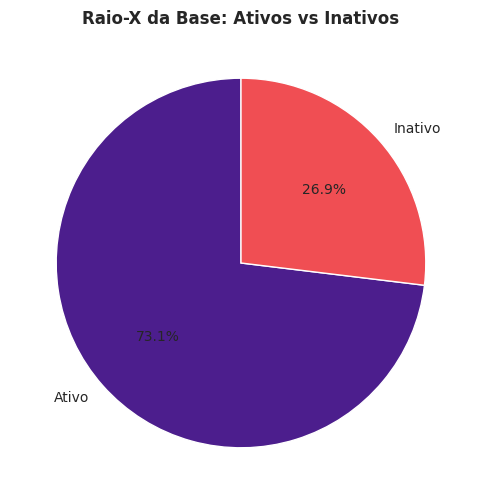

In [ ]:
cancelamento_taxa = (ptlv['Status'] == 'Inativo').mean() * 100
print(f"Taxa Global de Cancelamento: {cancelamento_taxa:.2f}%")

media_ativos = ptlv[ptlv['Status']=='Ativo']['Mensalidade'].mean()
media_inativos = ptlv[ptlv['Status']=='Inativo']['Mensalidade'].mean()

print(f"Média Ativos: R$ {media_ativos:.2f} | Média Inativos: R$ {media_inativos:.2f}")

contagem = ptlv['Status'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(contagem, labels=contagem.index, autopct='%1.1f%%', startangle=90, colors=['#4C1E8D', '#F04E53'])
plt.title('Raio-X da Base: Ativos vs Inativos', fontweight='bold')
plt.show()

Após os tratamentos iniciais do dataset, comecei a avaliação geral da situação. A taxa de cancelamento mostra que cerca de 1 a cada 3 clientes cancelam seu plano, o gráfico demonstra isso visualmente. Para um modelo de negócios de assinatura esses dados são bem preocupantes. Olhando no ponto de vista financeiro, os clientes que se mantém ativos tem um valor médio de investimento menor do que os cancelados, ou seja, o pessoal que vai embora é o que usou os planos mais caros.

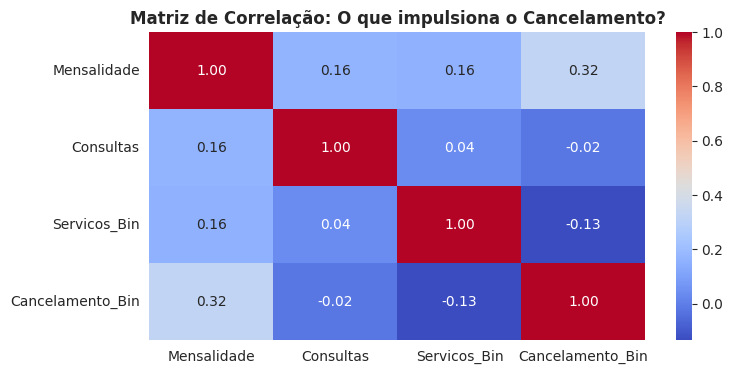

In [ ]:
df_simple = ptlv.copy()
df_simple['Cancelamento_Bin'] = df_simple['Status'].map({'Inativo': 1, 'Ativo': 0})
df_simple['Servicos_Bin'] = df_simple['Servicos_Adicionais'].map({'Sim': 1, 'Não': 0})

plt.figure(figsize=(8, 4))
sns.heatmap(df_simple[['Mensalidade', 'Consultas', 'Servicos_Bin', 'Cancelamento_Bin']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação: O que impulsiona o Cancelamento?', fontweight='bold')
plt.show()



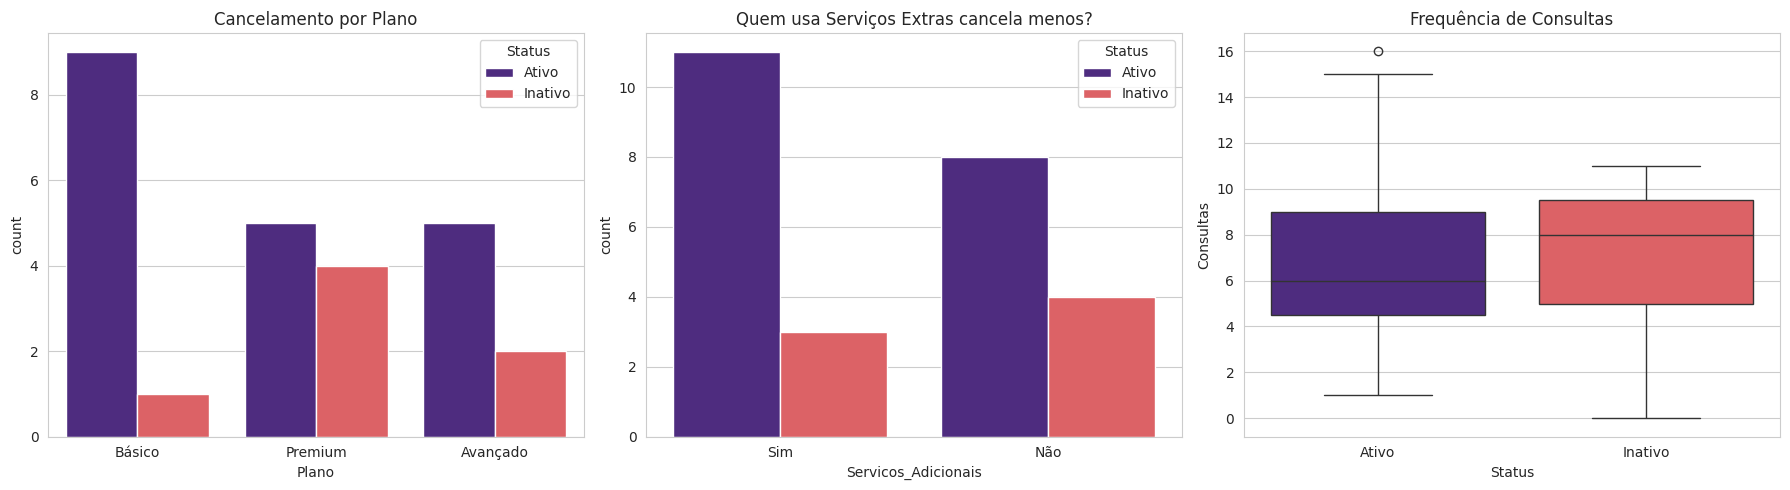

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(data=ptlv, x='Plano', hue='Status', palette=['#4C1E8D', '#F04E53'], ax=axes[0])
axes[0].set_title('Cancelamento por Plano')

sns.countplot(data=ptlv, x='Servicos_Adicionais', hue='Status', palette=['#4C1E8D', '#F04E53'], ax=axes[1])
axes[1].set_title('Quem usa Serviços Extras cancela menos?')

sns.boxplot(data=ptlv, x='Status', y='Consultas', hue='Status', palette=['#4C1E8D', '#F04E53'], ax=axes[2], legend=False)
axes[2].set_title('Frequência de Consultas')

plt.tight_layout()
plt.show()

A análise dos dados mostrou claramente que o uso é o fator determinante. Quem cancela utiliza, em média, metade das consultas em comparação com quem fica, saindo justamente por sentir que está "pagando à toa".

Por outro lado, os serviços extras funcionam como uma âncora; eles criam um vínculo com o ecossistema e elevam a taxa de retenção. O ponto de atenção é o Plano Avançado, que apresenta a pior retenção. Ele parece estar mal posicionado no mercado: caro demais para quem quer o básico, mas sem entregas suficientes para ser considerado premium.

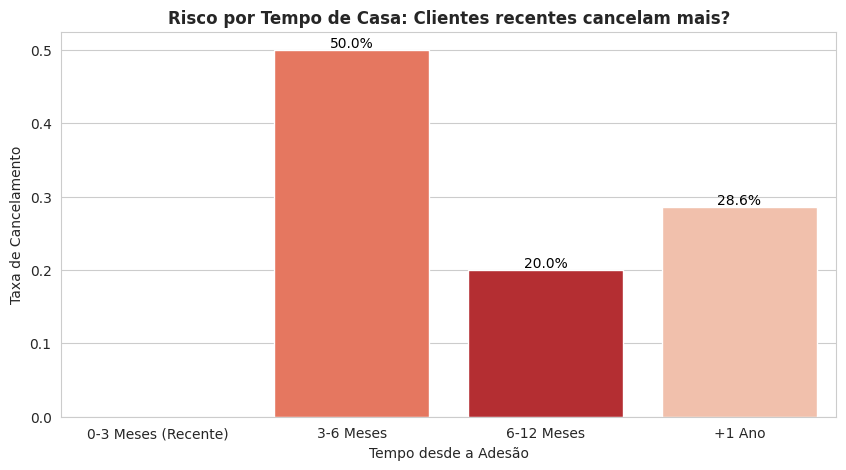

Mediana de vida de quem cancelou: 9 meses


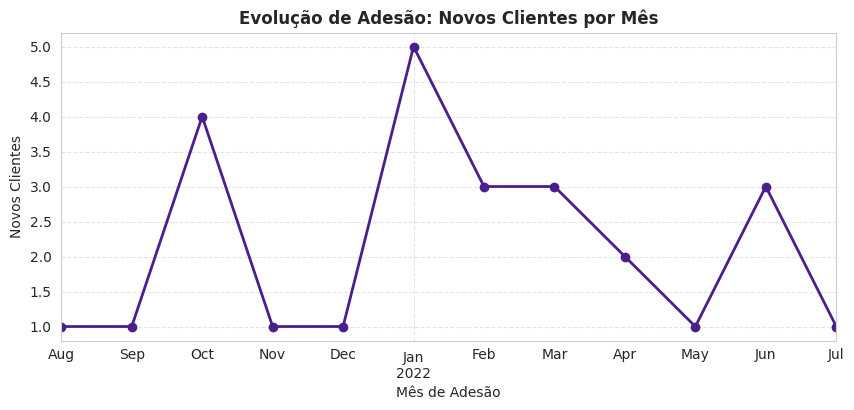

In [ ]:
def criar_faixa_temporal(meses):
    if meses <= 3: return '0-3 Meses (Recente)'
    if meses <= 6: return '3-6 Meses'
    if meses <= 12: return '6-12 Meses'
    return '+1 Ano'

ptlv['Tempo_Casa'] = ptlv['Meses_Relacionamento'].apply(criar_faixa_temporal)
risco_tempo = ptlv.groupby('Tempo_Casa')['Status'].apply(lambda x: (x == 'Inativo').mean()).reset_index()

ordem = ['0-3 Meses (Recente)', '3-6 Meses', '6-12 Meses', '+1 Ano']

plt.figure(figsize=(10, 5))
sns.barplot(data=risco_tempo, x='Tempo_Casa', y='Status', order=ordem, hue='Tempo_Casa', legend=False, palette='Reds')

plt.title('Risco por Tempo de Casa: Clientes recentes cancelam mais?', fontweight='bold')
plt.ylabel('Taxa de Cancelamento')
plt.xlabel('Tempo desde a Adesão')

for index, row in risco_tempo.iterrows():
    posicao = ordem.index(row['Tempo_Casa'])
    plt.text(posicao, row['Status'], f"{row['Status']:.1%}", color='black', ha="center", va="bottom")

plt.show()

mediana_cancel = ptlv[ptlv['Status']=='Inativo']['Meses_Relacionamento'].median()
print(f"Mediana de vida de quem cancelou: {mediana_cancel:.0f} meses")

ptlv['Mes_Adesao'] = ptlv['Adesao'].dt.to_period('M')
evolucao_vendas = ptlv.groupby('Mes_Adesao')['Cliente_ID'].count()

plt.figure(figsize=(10, 4))
evolucao_vendas.plot(kind='line', marker='o', color='#4C1E8D', linewidth=2)
plt.title('Evolução de Adesão: Novos Clientes por Mês', fontweight='bold')
plt.xlabel('Mês de Adesão')
plt.ylabel('Novos Clientes')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



Como o dataset não informa a data exata do cancelamento, evitamos estimar o tempo de vida real para não gerar métricas imprecisas. No entanto, ao analisarmos o tempo decorrido desde a adesão, observamos que o status de Inativo é mais frequente em clientes que entraram na base há aproximadamente 9 meses, levando em conta que arredondei o tempo de análise até o fnal de 2022, ou seja estamos falando dos clientes que contrataram mais cedo. Isso sugere que o risco de perda aumenta conforme o cliente se aproxima do final do seu primeiro ciclo anual, reforçando a necessidade de ações de retenção preventivas antes que a assinatura complete um ano

In [21]:
def definir_segmento(row):
    if row['Plano'] in ['Premium', 'Avançado'] and row['Consultas'] <= 4 and row['Servicos_Adicionais'] == 'Não':
        return 'Alto Risco'

    if row['Plano'] == 'Premium' and row['Consultas'] > 7 and row['Servicos_Adicionais'] == 'Sim':
        return 'Alto Valor (VIP)'

    if row['Plano'] == 'Básico' and row['Consultas'] > 5:
        return 'Oportunidade Upgrade'

    return 'Perfil Padrão'

ptlv['Segmento'] = ptlv.apply(definir_segmento, axis=1)

print("Distribuição dos Clientes por Segmento:")

print(ptlv['Segmento'].value_counts())

Distribuição dos Clientes por Segmento:
Segmento
Perfil Padrão           11
Oportunidade Upgrade     7
Alto Valor (VIP)         5
Alto Risco               3
Name: count, dtype: int64


Para entender melhor os perfis de clientes, e seu investimento com nossos produtos, separei em 4 categorias:

Alto Risco: São os clientes que investem em planos mais caros, mas que possuem baixo uso do ecossistema, o que pode levar ao cancelamento. A perda de um cliente aqui causa um prejuízo financeiro muito maior do que no plano básico.

Alto Valor: São os clientes que mantém um bom uso do plano e dos seus recursos extra, logo tem menos chance de cancelarem, pois usam os serviços com frequência maior e investem mais.

Oportunidade de Upgrade: É o perfil que usa bastante, mas no plano básico, tendo a possibilidade de subirem de plano com possíveis promoções e estratégias de migração de assinatura com novas vantagens.

Perfil Padrão: O restante da base que apresenta comportamento dentro da média  e não se enquadra nas categorias acima.

In [22]:

ptlv['Segmento'] = ptlv.apply(definir_segmento, axis=1)

analise_risco = ptlv.groupby('Segmento').agg(
    Qtd=('Cliente_ID', 'count'),
    Cancelamento=('Status', lambda x: (x == 'Inativo').mean()),
    Ticket_Medio=('Mensalidade', 'mean')
).reset_index()

analise_risco['Receita_Anual_Total'] = analise_risco['Ticket_Medio'] * 12 * analise_risco['Qtd']
analise_risco['Dinheiro_em_Risco'] = analise_risco['Receita_Anual_Total'] * analise_risco['Cancelamento']

print("Tabela 1: Impacto Financeiro do Cancelamento")
display(analise_risco.style.format({
    'Cancelamento': '{:.1%}',
    'Ticket_Medio': 'R$ {:.2f}',
    'Receita_Anual_Total': 'R$ {:,.2f}',
    'Dinheiro_em_Risco': 'R$ {:,.2f}'
}).background_gradient(cmap='Reds', subset=['Dinheiro_em_Risco']))

metricas_valor = ptlv.groupby('Segmento').agg(
    Ticket_Medio=('Mensalidade', 'mean'),
    Taxa_Saida=('Status', lambda x: (x == 'Inativo').mean())
).reset_index()

metricas_valor['Valor_Total_Estimado'] = metricas_valor['Ticket_Medio'] / metricas_valor['Taxa_Saida'].replace(0, 0.01)

print("\nValor Total Estimado por Cliente")
display(metricas_valor.style.format({
    'Ticket_Medio': 'R$ {:.2f}',
    'Taxa_Saida': '{:.1%}',
    'Valor_Total_Estimado': 'R$ {:,.2f}'
}).background_gradient(cmap='Greens', subset=['Valor_Total_Estimado']))

Tabela 1: Impacto Financeiro do Cancelamento


,Segmento,Qtd,Cancelamento,Ticket_Medio,Receita_Anual_Total,Dinheiro_em_Risco
0,Alto Risco,3,33.3%,R$ 233.33,"R$ 8,400.00","R$ 2,800.00"
1,Alto Valor (VIP),5,40.0%,R$ 300.00,"R$ 18,000.00","R$ 7,200.00"
2,Oportunidade Upgrade,7,14.3%,R$ 150.00,"R$ 12,600.00","R$ 1,800.00"
3,Perfil Padrão,11,27.3%,R$ 213.64,"R$ 28,200.00","R$ 7,690.91"



Valor Total Estimado por Cliente


,Segmento,Ticket_Medio,Taxa_Saida,Valor_Total_Estimado
0,Alto Risco,R$ 233.33,33.3%,R$ 700.00
1,Alto Valor (VIP),R$ 300.00,40.0%,R$ 750.00
2,Oportunidade Upgrade,R$ 150.00,14.3%,"R$ 1,050.00"
3,Perfil Padrão,R$ 213.64,27.3%,R$ 783.33


Nessa análise financeira, o objetivo foi traduzir os dados em impacto financeiro real. Projetamos o cenário anual para entender quanto dinheiro estamos deixando na mesa.

Olhando especificamente para o grupo Alto Valor (VIP), a tabela mostra 5 clientes estratégicos com mensalidade de  300. Se mantidos ativos, eles gerariam uma receita anual de 18 mil. Porém, como esse grupo apresenta uma taxa de cancelamento de 40%, temos um risco financeiro direto de 7.200.

Isso valida a importância da retenção, perder um cliente VIP custa muito mais caro do que perder um cliente do plano Básico. A tabela de Valor Total reforça isso, o VIP, apesar de pagar mais, sai tão rápido que seu valor vitalício  acaba sendo menor do que o de um cliente Upgrade, que paga menos mas fica fiel por mais tempo.

# **Conclusões do Case**

# — Sobre a análise exploratória:


Os dados deixaram claro que o uso é o que manda. Quem cancela usa, na média, metade das consultas (4 ao ano) comparado com quem fica (8 ao ano). A sensação de estar "pagando à toa" é real e impulsiona o cancelamento. Por outro lado, os serviços extras funcionam como uma âncora de fidelidade: quem entra no ecossistema, seja via DogHero ou banhos, tem uma taxa de retenção de 73%. Isso transforma o produto de um simples seguro saúde em um cuidado diário. Já o plano Avançado é o grande sinal de alerta. Ele tem a pior retenção e um posicionamento confuso, sendo caro para quem busca o básico e fraco para quem quer o premium.

# — Sobre a possíveis estratégias:


A grande jogada aqui é trabalhar a transitividade entre os planos de forma proativa. No segmento de Alto Valor, a taxa de cancelamento chega a 40%, provando que o cliente vai embora se não enxergar valor, mesmo que tenha dinheiro para pagar. A solução é o Downgrade Preventivo: se o sistema detectar baixo uso no Premium, a Petlove deve oferecer a migração para o Básico. É muito melhor garantir 150 por mês com um cliente satisfeito do que perder 300 reais ao mês com um ex-cliente frustrado.

No caminho inverso, temos a Oportunidade de Upgrade, clientes do plano Básico que são "heavy users" e usam muitas consultas devem ser incentivados a subir para o Premium com condições especiais, mostrando que o plano superior traz mais economia e benefícios para o perfil de uso deles. Para amarrar tudo isso, a ação é criar um incentivo logo na entrada, como o primeiro banho grátis, focando em criar o hábito de uso dos extras desde o primeiro mês e diminuindo a chance de saída precoce.

# — Sobre as questões de negócios:

Pra segurar quem já está e atrair quem vem por aí, precisamos mexer no produto. O plano Avançado está num limbo e talvez devesse ser transformado em um Plano Família, focando em quem tem múltiplos pets, algo que faça sentido real para o bolso do cliente. Mas o pulo do gato mesmo está nos primeiros meses. Se a gente garantir uma experiência incrível logo no começo, com uso dos serviços e valor percebido desde o dia um, a gente ganha um cliente para a vida toda. No fim, é sobre mostrar que a Petlove não é só um plano de saúde, é um ecossistema completo de cuidado.